In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [2]:
res = pd.read_csv('res.csv')
df = pd.read_csv('df.csv')

### Cyt vs mem

<IPython.core.display.Javascript object>


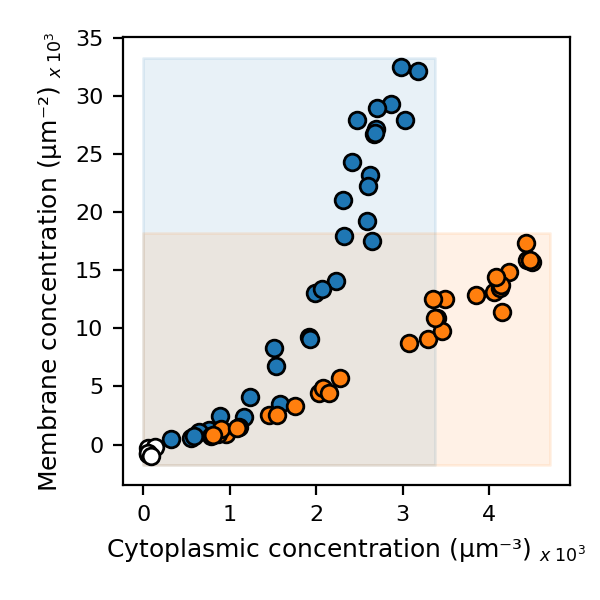

In [3]:
fig, ax = plt.subplots()
x = df['Cyt'] / 1000
y = df['Mem_tot'] / 1000
ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], facecolors='tab:blue', edgecolors='k')
ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], facecolors='tab:orange', edgecolors='k')
ax.scatter(x[df.Line == 'n2'], y[df.Line == 'n2'], facecolors='w', edgecolors='k')
ax.set_xlabel('Cytoplasmic concentration (μm⁻³) ' + r'$_{x\;10^{3}}$', fontsize=9)
ax.set_ylabel('Membrane concentration (μm⁻²) ' + r'$_{x\;10^{3}}$', fontsize=9)
ax.tick_params(axis='both', labelsize=8)

xmin = np.min(x[df.Line == 'n2']*0)
ymin = np.min(y[df.Line == 'n2']-0.8)

xmax_wt = np.max(x[df.Line == 'nwg201']+0.2)
ymax_wt = np.max(y[df.Line == 'nwg201']+0.8)
xmax_c56s = np.max(x[df.Line == 'nwg246']+0.2)
ymax_c56s = np.max(y[df.Line == 'nwg246']+0.8)

ax.fill_between([xmin, xmax_wt], [ymin, ymin], [ymax_wt, ymax_wt], alpha=0.1, color='tab:blue', zorder=0)
ax.fill_between([xmin, xmax_c56s], [ymin, ymin], [ymax_c56s, ymax_c56s], alpha=0.1, color='tab:orange', zorder=0)

fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs/cyt_vs_mem.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


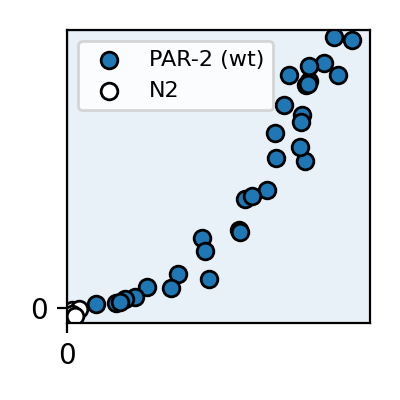

In [4]:
fig, ax = plt.subplots()
x = df['Cyt'] / 1000
y = df['Mem_tot'] / 1000
ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], facecolors='tab:blue', edgecolors='k', label='PAR-2 (wt)')
ax.scatter(x[df.Line == 'n2'], y[df.Line == 'n2'], facecolors='w', edgecolors='k', label='N2')
ax.set_xlim(xmin, xmax_wt)
ax.set_ylim(ymin, ymax_wt)
ax.fill_between([xmin, xmax_wt], [ymin, ymin], [ymax_wt, ymax_wt], alpha=0.1, color='tab:blue', zorder=0)
ax.set_xticks([0])
ax.set_yticks([0])
ax.legend(fontsize=8)
fig.set_size_inches(2, 2)
fig.tight_layout()
fig.savefig('Figs/cyt_vs_mem_wt.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


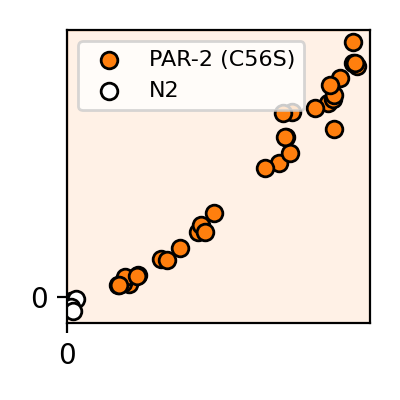

In [5]:
fig, ax = plt.subplots()
x = df['Cyt'] / 1000
y = df['Mem_tot'] / 1000
ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], facecolors='tab:orange', edgecolors='k', 
           label='PAR-2 (C56S)')
ax.scatter(x[df.Line == 'n2'], y[df.Line == 'n2'], facecolors='w', edgecolors='k', label='N2')
ax.set_xlim(xmin, xmax_c56s)
ax.set_ylim(ymin, ymax_c56s)
ax.fill_between([xmin, xmax_c56s], [ymin, ymin], [ymax_c56s, ymax_c56s], alpha=0.1, color='tab:orange', zorder=0)
ax.set_xticks([0])
ax.set_yticks([0])
ax.legend(fontsize=8)
fig.set_size_inches(2, 2)
fig.tight_layout()
fig.savefig('Figs/cyt_vs_mem_c56s.png', dpi=600, transparent=True)

### Cyt vs mem with LOWESS

In [6]:
# from statsmodels.nonparametric.smoothers_lowess import lowess

# def confidence_interval_lowess(xdata, ydata, interval=95, n=1000):
#     xvals = np.linspace(0, max(xdata), 100)
#     res = []
#     res_whole = lowess(ydata, xdata, xvals=xvals)
#     for i in range(n):  
#         inds = np.random.choice(range(len(ydata)), len(ydata))
#         res.append(lowess(ydata[inds], xdata[inds], xvals=xvals))
#     res = np.array(res)
#     res_lower = np.percentile(res, (100 - interval) / 2, axis=0)
#     res_upper = np.percentile(res, 50 + (interval / 2), axis=0)
#     return xvals, res_whole, res_lower, res_upper

In [7]:
# xvals1, res1, res_lower1, res_upper1 = confidence_interval_lowess(x[df.Line.isin(['nwg201', 'n2'])].to_numpy(), 
#                                                                   y[df.Line.isin(['nwg201', 'n2'])].to_numpy())
# xvals2, res2, res_lower2, res_upper2 = confidence_interval_lowess(x[df.Line.isin(['nwg246', 'n2'])].to_numpy(), 
#                                                                   y[df.Line.isin(['nwg246', 'n2'])].to_numpy())

In [8]:
# fig, ax = plt.subplots()

# ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], facecolors='tab:blue', edgecolors='k')
# ax.plot(xvals1, res1, c='tab:blue', zorder=0)
# ax.fill_between(xvals1, res_lower1, res_upper1, alpha=0.1, color='tab:blue')

# ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], facecolors='tab:orange', edgecolors='k')
# ax.plot(xvals2, res2, c='tab:orange', zorder=0)
# ax.fill_between(xvals2, res_lower2, res_upper2, alpha=0.1, color='tab:orange')

# ax.scatter(x[df.Line == 'n2'], y[df.Line == 'n2'], facecolors='w', edgecolors='k')

# ax.set_xlabel('Cytoplasmic concentration (a.u.)')
# ax.set_ylabel('Membrane concentration (a.u.)')
# ax.tick_params(axis='both', labelsize=8)
# fig.set_size_inches(3, 3)
# fig.tight_layout()

### Cyt vs mem with exponent model

In [9]:
# import scipy.odr as odr
# from scipy.optimize import curve_fit

# def fitting(cyt, mem):
#     # Ols fit
#     popt, pcov = curve_fit(lambda x, a, b: a * (x ** b), cyt, mem)
#     a_min_0, b_min_0 = popt

#     # Odr fit
#     def perform_odr(x, y):
#         quadr = odr.Model(lambda B, x: B[0] * (x ** B[1]))
#         mydata = odr.Data(x, y)
#         myodr = odr.ODR(mydata, quadr, beta0=[a_min_0, b_min_0])
#         output = myodr.run()
#         return output

#     regression = perform_odr(cyt, mem)
#     a_min, b_min = regression.beta
#     return a_min, b_min

# def bootstrap_fitting(cyts, mems, n=1000):
#     a = np.zeros(n)
#     b = np.zeros(n)

#     for i in range(n):  
#         inds = np.random.choice(range(len(cyts)), len(cyts))
#         a[i], b[i] = fitting(cyts[inds], mems[inds])
#     return a, b

# def confidence_interval(cyts, mems, n_bootsrap=1000, n_x=100, interval=95):
#     x = np.linspace(0, max(cyts), n_x)
    
#     # Full model
#     a, b = fitting(cyts, mems)
#     res = a * x ** b
#     print(b)
    
#     # Confidence interval
#     a, b = bootstrap_fitting(cyts, mems)
#     all_fits = a[:, np.newaxis] * x[np.newaxis, :] ** b[:, np.newaxis]
#     all_fits_lower = np.percentile(all_fits, (100 - interval) / 2, axis=0)
#     all_fits_upper = np.percentile(all_fits, 50 + (interval / 2), axis=0)

#     return x, res, all_fits_lower, all_fits_upper

In [10]:
# xvals1, res1, res_lower1, res_upper1 = confidence_interval(x[df.Line == 'nwg201'].to_numpy(), 
#                                                                   y[df.Line == 'nwg201'].to_numpy())
# xvals2, res2, res_lower2, res_upper2 = confidence_interval(x[df.Line == 'nwg246'].to_numpy(), 
#                                                                   y[df.Line == 'nwg246'].to_numpy())

In [11]:
# fig, ax = plt.subplots()

# # ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], facecolors='tab:blue', edgecolors='k')
# ax.plot(xvals1, res1, c='tab:blue', zorder=0)
# ax.fill_between(xvals1, res_lower1, res_upper1, alpha=0.1, color='tab:blue')

# # ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], facecolors='tab:orange', edgecolors='k')
# ax.plot(xvals2, res2, c='tab:orange', zorder=0)
# ax.fill_between(xvals2, res_lower2, res_upper2, alpha=0.1, color='tab:orange')

# ax.scatter(x[df.Line == 'n2'], y[df.Line == 'n2'], facecolors='w', edgecolors='k')

# ax.set_xlabel('Cytoplasmic concentration (a.u.)')
# ax.set_ylabel('Membrane concentration (a.u.)')
# ax.tick_params(axis='both', labelsize=8)
# fig.set_size_inches(3, 3)
# fig.tight_layout()